In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score

In [4]:
# load data
X = pd.read_csv('train.csv')
X_test = pd.read_csv('test.csv')
y = X.Survived

# split data
X.drop(['Survived'], axis=1, inplace=True)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)


In [6]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
140,141,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
817,818,2,"Mallet, Mr. Albert",male,31.0,1,1,S.C./PARIS 2079,37.0042,NaN,C
378,379,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C
491,492,3,"Windelov, Mr. Einar",male,21.0,0,0,SOTON/OQ 3101317,7.2500,NaN,S


In [7]:
# iteration 1: numerical columns only
X_train1 = X_train.select_dtypes(exclude=['object'])
X_valid1 = X_valid.select_dtypes(exclude=['object'])
X_test1 = X_test.select_dtypes(exclude=['object'])

# only age has null values of the numerical values
# fill with the mean
X_train1.fillna(X_train1.mean(), inplace=True)
X_valid1.fillna(X_valid1.mean(), inplace=True)
X_test1.fillna(X_test1.mean(), inplace=True)

In [8]:
X_train1.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
140,141,3,29.745184,0,2,15.2458
439,440,2,31.000000,0,0,10.5000
817,818,2,31.000000,1,1,37.0042
378,379,3,20.000000,0,0,4.0125
491,492,3,21.000000,0,0,7.2500


In [9]:
def get_score_RFC(X_train, X_valid, y_train, y_valid):
    model = RandomForestClassifier(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return accuracy_score(y_valid, preds)

def get_score_LR(X_train, X_valid, y_train, y_valid):
    model = LogisticRegression(random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return accuracy_score(y_valid, preds)

def get_score_SVC(X_train, X_valid, y_train, y_valid):
    model = SVC(random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return accuracy_score(y_valid, preds)

def get_score_XGB(X_train, X_valid, y_train, y_valid):
    model = XGBClassifier(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return accuracy_score(y_valid, preds)

In [10]:
print('accuracy score from numerical columns only:')
get_score_RFC(X_train1, X_valid1, y_train, y_valid), get_score_LR(X_train1, X_valid1, y_train, y_valid), get_score_SVC(X_train1, X_valid1, y_train, y_valid), get_score_XGB(X_train1, X_valid1, y_train, y_valid)

accuracy score from numerical columns only:


c:\Users\niko-\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.7430167597765364, 0.7430167597765364, 0.659217877094972, 0.7486033519553073)

In [11]:
# iteration 2: numerical columns only, with scaling (age, fare, passengerId, Parch, SibSp)
def normalize_data(X_train, X_valid, X_test): # only normalize age, fare, passengerId
    scaler = StandardScaler()
    X_train_toscale = X_train.loc[:, ['Age', 'Fare', 'PassengerId', 'Parch', 'SibSp']]
    X_valid_toscale = X_valid.loc[:, ['Age', 'Fare', 'PassengerId', 'Parch', 'SibSp']]
    X_test_toscale = X_test.loc[:, ['Age', 'Fare', 'PassengerId', 'Parch', 'SibSp']]
    scaler.fit(X_train_toscale)
    X_train_scaled = scaler.transform(X_train_toscale)
    X_valid_scaled = scaler.transform(X_valid_toscale)
    X_test_scaled = scaler.transform(X_test_toscale)

    # concatenate the scaled columns back to the original dataframes
    X_train.drop(['Age', 'Fare', 'PassengerId', 'Parch', 'SibSp'], axis=1, inplace=True)
    X_valid.drop(['Age', 'Fare', 'PassengerId', 'Parch', 'SibSp'], axis=1, inplace=True)
    X_test.drop(['Age', 'Fare', 'PassengerId', 'Parch', 'SibSp'], axis=1, inplace=True)
    
    X_train = pd.concat([X_train, pd.DataFrame(X_train_scaled, index=X_train.index, columns=['Age', 'Fare', 'PassengerId', 'Parch', 'SibSp'])], axis=1)
    X_valid = pd.concat([X_valid, pd.DataFrame(X_valid_scaled, index=X_valid.index, columns=['Age', 'Fare', 'PassengerId', 'Parch', 'SibSp'])], axis=1)
    X_test = pd.concat([X_test, pd.DataFrame(X_test_scaled, index=X_test.index, columns=['Age', 'Fare', 'PassengerId', 'Parch', 'SibSp'])], axis=1)
    return X_train, X_valid, X_test

X_train2, X_valid2, X_test2 = normalize_data(X_train1.copy(), X_valid1.copy(), X_test1.copy())

In [12]:
X_train2.head()

,Pclass,Age,Fare,PassengerId,Parch,SibSp
140,3,0.000000,-0.331679,-1.163430,1.959264,-0.464452
439,2,0.095932,-0.426405,-0.012638,-0.477410,-0.464452
817,2,0.095932,0.102620,1.442209,0.740927,0.412710
378,3,-0.745030,-0.555896,-0.247415,-0.477410,-0.464452
491,3,-0.668579,-0.491276,0.187499,-0.477410,-0.464452


In [13]:
print('accuracy score from numerical columns only (normalized):')
get_score_RFC(X_train2, X_valid2, y_train, y_valid), get_score_LR(X_train2, X_valid2, y_train, y_valid), get_score_SVC(X_train2, X_valid2, y_train, y_valid), get_score_XGB(X_train1, X_valid1, y_train, y_valid)

accuracy score from numerical columns only (normalized):


(0.7318435754189944, 0.7430167597765364, 0.770949720670391, 0.7486033519553073)

In [14]:
# iteration 3: iteration 2 with categorical numerical variables transformed to one-hot encoding (pclass (3), sex (2), embarked (3), SibSp (has/has not), Parch (has/has not))
# drop name, ticket, cabin
X_train3 = X_train.drop(['Name', 'Ticket', 'Cabin'], axis=1)
X_valid3 = X_valid.drop(['Name', 'Ticket', 'Cabin'], axis=1)
X_test3 = X_test.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# one-hot encoding for low cardinality columns
low_card_X_train = X_train3.loc[:, ['Pclass', 'Sex', 'Embarked']]
low_card_X_valid = X_valid3.loc[:, ['Pclass', 'Sex', 'Embarked']]
low_card_X_test = X_test3.loc[:, ['Pclass', 'Sex', 'Embarked']]

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(low_card_X_train))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(low_card_X_valid))
OH_cols_test = pd.DataFrame(OH_encoder.transform(low_card_X_test))

OH_cols_train.index = X_train3.index
OH_cols_valid.index = X_valid3.index
OH_cols_test.index = X_test3.index

# one-hot encoding for high cardinality columns
high_card_X_train = X_train3.loc[:, ['SibSp', 'Parch']]
high_card_X_valid = X_valid3.loc[:, ['SibSp', 'Parch']]
high_card_X_test = X_test3.loc[:, ['SibSp', 'Parch']]

high_card_X_train['SibSp'] = high_card_X_train['SibSp'].apply(lambda x: 1 if x > 0 else 0)
high_card_X_train['Parch'] = high_card_X_train['Parch'].apply(lambda x: 1 if x > 0 else 0)
high_card_X_valid['SibSp'] = high_card_X_valid['SibSp'].apply(lambda x: 1 if x > 0 else 0)
high_card_X_valid['Parch'] = high_card_X_valid['Parch'].apply(lambda x: 1 if x > 0 else 0)
high_card_X_test['SibSp'] = high_card_X_test['SibSp'].apply(lambda x: 1 if x > 0 else 0)
high_card_X_test['Parch'] = high_card_X_test['Parch'].apply(lambda x: 1 if x > 0 else 0)

# concatenate all columns
X_train3 = pd.concat([X_train2.drop(['Pclass', 'SibSp', 'Parch'], axis=1), OH_cols_train, high_card_X_train], axis=1)
X_valid3 = pd.concat([X_valid2.drop(['Pclass', 'SibSp', 'Parch'], axis=1), OH_cols_valid, high_card_X_valid], axis=1)
X_test3 = pd.concat([X_test2.drop(['Pclass', 'SibSp', 'Parch'], axis=1), OH_cols_test, high_card_X_test], axis=1)
X_train3.columns = X_train3.columns.astype(str)
X_valid3.columns = X_valid3.columns.astype(str)
X_test3.columns = X_test3.columns.astype(str)

In [15]:
X_train3.head()

,Age,Fare,PassengerId,0,1,2,3,4,5,6,7,8,SibSp,Parch
140,0.000000,-0.331679,-1.163430,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0,1
439,0.095932,-0.426405,-0.012638,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
817,0.095932,0.102620,1.442209,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,1
378,-0.745030,-0.555896,-0.247415,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0
491,-0.668579,-0.491276,0.187499,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0


In [16]:
print('accuracy score with categorical variables one-hot encoded:')
get_score_RFC(X_train3, X_valid3, y_train, y_valid), get_score_LR(X_train3, X_valid3, y_train, y_valid), get_score_SVC(X_train3, X_valid3, y_train, y_valid), get_score_XGB(X_train3, X_valid3, y_train, y_valid)

accuracy score with categorical variables one-hot encoded:


(0.8435754189944135,
 0.8044692737430168,
 0.8100558659217877,
 0.8435754189944135)

In [17]:
# build neural network
def build_model1(X_train, y_train, X_valid, y_valid):
    model = keras.Sequential([
        layers.Dense(units=64, activation='relu', input_shape=[X_train.shape[1]]),
        layers.Dense(units=64, activation='relu'),
        layers.Dense(units=1, activation='sigmoid')
    ])
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['binary_accuracy']
    )
    early_stopping = keras.callbacks.EarlyStopping(
        patience=10,
        min_delta=0.001,
        restore_best_weights=True
    )
    history = model.fit(
        X_train, y_train,
        validation_data=(X_valid, y_valid),
        batch_size=32,
        epochs=50,
        callbacks=[early_stopping],
        verbose=0
    )
    history_df = pd.DataFrame(history.history)
    history_df.loc[:, ['loss', 'val_loss']].plot()
    history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()

    print(f"Minimum validation loss: {history_df['val_loss'].min()}")
    print(f"Maximum validation accuracy: {history_df['val_binary_accuracy'].max()}")
    return model

c:\Users\niko-\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Minimum validation loss: 0.3839539587497711
Maximum validation accuracy: 0.8435754179954529


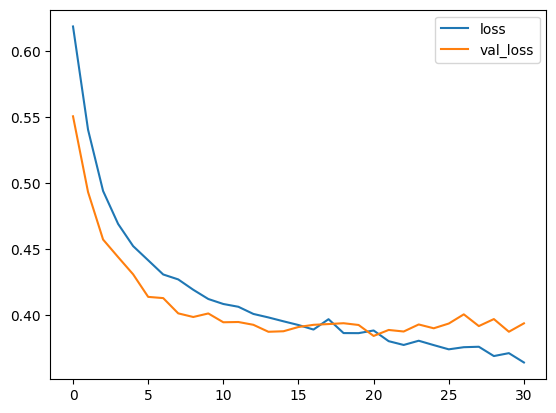

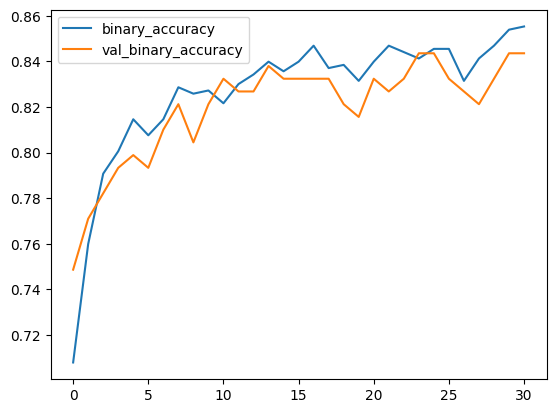

In [18]:
model1 = build_model1(X_train3, y_train, X_valid3, y_valid)

In [19]:
# similar model but with dropout, batch normalization, one more layer, and a learning rate schedule
def build_model2(X_train, y_train, X_valid, y_valid):
    model = keras.Sequential([
        layers.BatchNormalization(),
        layers.Dense(units=64, activation='relu', input_shape=[X_train.shape[1]]),
        layers.Dropout(rate=0.3),
        layers.BatchNormalization(),
        layers.Dense(units=64, activation='relu'),
        layers.Dropout(rate=0.3),
        layers.BatchNormalization(),
        layers.Dense(units=64, activation='relu'),
        layers.Dropout(rate=0.3),
        layers.BatchNormalization(),
        layers.Dense(units=1, activation='sigmoid')
    ])
    lr_sched = keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate = 0.02,
        decay_steps=10000,
        decay_rate=0.9
    )
    opt = keras.optimizers.Adam(learning_rate=lr_sched)
    model.compile(
        optimizer=opt,
        loss='binary_crossentropy',
        metrics=['binary_accuracy']
    )
    early_stopping = keras.callbacks.EarlyStopping(
        patience=10,
        min_delta=0.001,
        restore_best_weights=True
    )
    history = model.fit(
        X_train, y_train,
        validation_data=(X_valid, y_valid),
        batch_size=32,
        epochs=50,
        callbacks=[early_stopping],
        verbose=0
    )
    history_df = pd.DataFrame(history.history)
    history_df.loc[:, ['loss', 'val_loss']].plot()
    history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()

    print(f"Minimum validation loss: {history_df['val_loss'].min()}")
    print(f"Maximum validation accuracy: {history_df['val_binary_accuracy'].max()}")
    return model

c:\Users\niko-\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Minimum validation loss: 0.393917053937912
Maximum validation accuracy: 0.8379888534545898


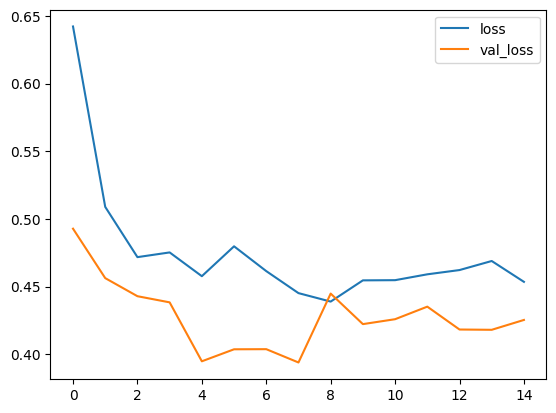

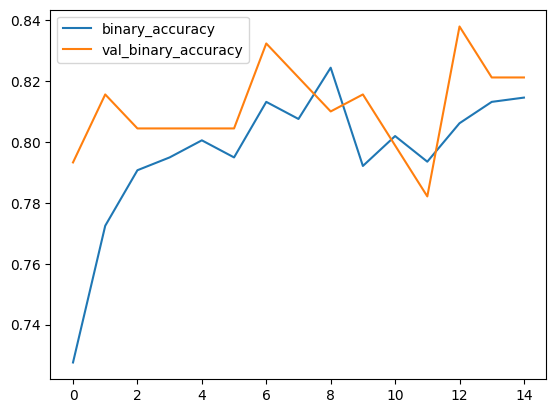

In [20]:
model2 = build_model2(X_train3, y_train, X_valid3, y_valid)

In [35]:
# make predictions on test set
def make_predictions(model, X_test, passengerIds):
    preds = model.predict(X_test)
    preds = [1 if x > 0.5 else 0 for x in preds]
    return pd.concat([passengerIds, pd.Series(preds, name='Survived')], axis=1)

preds = make_predictions(model2, X_test3, X_test.PassengerId)
preds.to_csv('submission.csv', index=False)
preds.head()

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
